In [51]:
import pandas as pd
from scipy import stats
from matplotlib import pyplot as plt
from collections import Counter
from tqdm import tqdm, trange
import numpy as np
import tikzplotlib
from mlxtend.evaluate import permutation_test
from nltk.corpus import wordnet as wn

In [2]:
soc_df = pd.read_csv("data/gazetteer/soc.csv", index_col=None)
gzt_df = pd.read_csv("data/gazetteer/inflection.csv", index_col=None)

In [3]:
soc_df.head()

,2018 SOC Code,2018 SOC Title,2018 SOC Direct Match Title,Illustrative Example
0,11-1011,Chief Executives,Admiral,x
1,11-1011,Chief Executives,CEO,NaN
2,11-1011,Chief Executives,Chief Executive Officer,NaN
3,11-1011,Chief Executives,Chief Financial Officer,x
4,11-1011,Chief Executives,Chief Operating Officer,x


In [6]:
(soc_df["2018 SOC Direct Match Title"].str.split().agg(len) == 1).sum()

426

In [7]:
426/6520

0.06533742331288343

In [8]:
gzt_df.head()

,word,singular,plural,singular_key,plural_key
0,1st lieutenant,1st lieutenant,1st lieutenants,1st lieutenant,1st lieutenant
1,2nd lieutenant,2nd lieutenant,2nd lieutenants,2nd lieutenant,2nd lieutenant
2,3d animator,3d animator,3d animators,3d animator,3d animator
3,3rd grade reading teacher,3rd grade reading teacher,3rd grade reading teachers,3rd grade reading teacher,3rd grade reading teacher
4,4-h youth development specialist,4-h youth development specialist,4-h youth development specialists,4-h youth development specialist,4-h youth development specialist


In [10]:
(gzt_df.word.str.split().agg(len) == 1).sum()

1881

In [11]:
1881/10952

0.17174945215485757

In [12]:
imdb_df = pd.read_csv("data/imdb/imdb.ngram.csv", index_col=None)

In [13]:
imdb_df.imdb_kind.isin(["movie","episode"]).sum()/len(imdb_df)

0.9401608847188929

In [14]:
Counter(imdb_df.imdb_kind.dropna())

Counter({'movie': 43790,
         'tv series': 1582,
         'episode': 84070,
         'tv mini series': 587,
         'tv movie': 2769,
         'tv short': 248,
         'video movie': 1975,
         'video game': 99})

In [41]:
imdb_df.imdb_countries.str.contains("(United States)|(United Kingdom)").sum()/imdb_df.imdb_countries.notna().sum()

0.6797640282608046

In [21]:
imdb_df.imdb_countries.isna().sum()/len(imdb_df)

0.26211414873748146

In [25]:
imdb_df.imdb_languages.str.contains("English").sum()/imdb_df.imdb_languages.notna().sum()

0.7827723391891288

In [26]:
Counter(imdb_df[(imdb_df.year >= 2010) & (imdb_df.year <= 2017)].imdb_kind.dropna())

Counter({'movie': 13257,
         'tv mini series': 163,
         'tv movie': 984,
         'episode': 43320,
         'video movie': 497,
         'tv series': 613,
         'video game': 10,
         'tv short': 70})

In [27]:
43320/13257

3.2677076261597646

In [28]:
imdb_genre = [genre for imdb_genre_str in imdb_df.imdb_genres.dropna() for genre in imdb_genre_str.split(";")]

In [29]:
Counter(imdb_genre)

Counter({'Comedy': 50868,
         'Fantasy': 15538,
         'Romance': 23314,
         'Drama': 77460,
         'War': 3942,
         'History': 4871,
         'Crime': 27053,
         'Film-Noir': 172,
         'Thriller': 26600,
         'Action': 25562,
         'Adventure': 19606,
         'Family': 13000,
         'Biography': 2724,
         'Sport': 1674,
         'Mystery': 24113,
         'Musical': 1874,
         'Western': 1766,
         'Animation': 11726,
         'Short': 3072,
         'Documentary': 7099,
         'Sci-Fi': 19219,
         'Music': 3231,
         'Horror': 10105,
         'News': 401,
         'Adult': 204,
         'Talk-Show': 348,
         'Reality-TV': 2361,
         'Game-Show': 1441})

In [31]:
genre_count, genre_ticks = [], []

for genre, count in sorted(Counter(imdb_genre).items(), key=lambda x: x[1], reverse=True):
    genre_count.append(count)
    genre_ticks.append(genre)

genre_ticks = [f"{x:>10s}" for x in genre_ticks]
genre_axis = np.arange(len(genre_ticks))

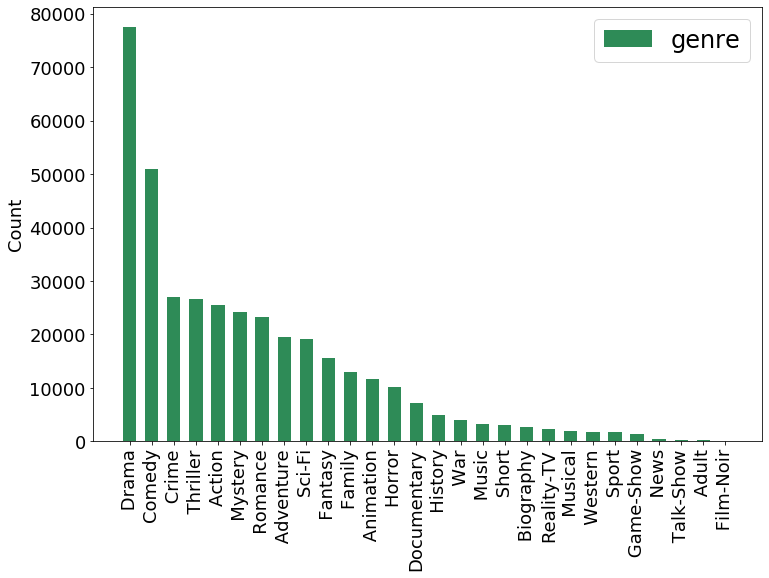

In [34]:
topk = 100

plt.figure(figsize=(12, 8))
plt.rcParams.update({"font.size":18})

plt.bar(genre_axis[:topk], genre_count[:topk], width=0.6, color="seagreen", label="genre")
plt.xticks(ticks=genre_axis[:topk], labels=genre_ticks[:topk], rotation=90)
plt.legend(prop={"size":24})
plt.ylabel("Count")

plt.show()

In [36]:
sum(genre_count[:2])/sum(genre_count)

0.33828925724408454

In [40]:
imdb_df.imdb_genres.str.contains(r"(Drama)|(Comedy)").sum()/len(imdb_df)

0.8080339416756128

In [42]:
imdb_df.n_sentences.sum(), imdb_df.n_words.sum()

(126834389, 942179585)

In [43]:
imdb_df.columns

Index(['year', 'imdb_ID', 'xml_ID', 'n_sentences', 'n_words',
       'n_sentences_title', 'imdb_year', 'imdb_genres', 'imdb_countries',
       'imdb_kind', 'imdb_languages', 'imdb_title', 'first_imdb_country',
       'first_imdb_language', '1_gram_count', '2_gram_count', '3_gram_count',
       '4_gram_count', '5_gram_count'],
      dtype='object')

In [44]:
imdb_df.first_imdb_language.isna().sum()

24143

In [45]:
Counter(imdb_df.first_imdb_language.dropna())

Counter({'English': 81950,
         'German': 1464,
         'Italian': 1903,
         'French': 3929,
         'Spanish': 2157,
         'Japanese': 3902,
         'Swedish': 730,
         'Portuguese': 637,
         'Danish': 651,
         'Hindi': 1532,
         'Slovenian': 42,
         'Latin': 13,
         'Czech': 389,
         'Bengali': 80,
         'Russian': 847,
         'Finnish': 281,
         'Polish': 476,
         'Hungarian': 221,
         'Serbo-Croatian': 158,
         'Swiss German': 26,
         'Georgian': 36,
         'Romanian': 152,
         'Greek': 2209,
         'Ukrainian': 24,
         'Norwegian': 403,
         'Arabic': 168,
         'Dutch': 510,
         'Mandarin': 1008,
         'Bulgarian': 50,
         'Urdu': 25,
         'Turkish': 381,
         'None': 54,
         'Hebrew': 237,
         'Croatian': 47,
         'Esperanto': 1,
         'Slovak': 53,
         'Kirghiz': 7,
         'Persian': 131,
         'Hausa': 1,
         'Korean': 1468,


In [46]:
(imdb_df.first_imdb_language != "English").sum()/imdb_df.first_imdb_language.notna().sum()

0.4831969961110366

In [47]:
mentions_df = pd.read_csv("data/mentions/mentions.word_filtered.sense_filtered.soc_mapped.merged.csv", index_col=None)

/home/sbaruah/.pyenv/versions/3.6.7/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [48]:
mentions_df.columns

Index(['profession', 'imdb', 'sent', 'rsi', 'left', 'mention', 'right',
       'start', 'end', 'pos', 'ner', 'sense', 'no_pos_sense', 'is_profession',
       'is_nopos_profession', 'is_person', 'profession_merge', 'soc_code',
       'soc_name'],
      dtype='object')

In [49]:
mentions_df.profession.unique().size

4073

In [50]:
mentions_df.shape

(3657827, 19)

In [52]:
wn.synsets("bank")

[Synset('bank.n.01'),
 Synset('depository_financial_institution.n.01'),
 Synset('bank.n.03'),
 Synset('bank.n.04'),
 Synset('bank.n.05'),
 Synset('bank.n.06'),
 Synset('bank.n.07'),
 Synset('savings_bank.n.02'),
 Synset('bank.n.09'),
 Synset('bank.n.10'),
 Synset('bank.v.01'),
 Synset('bank.v.02'),
 Synset('bank.v.03'),
 Synset('bank.v.04'),
 Synset('bank.v.05'),
 Synset('deposit.v.02'),
 Synset('bank.v.07'),
 Synset('trust.v.01')]